# Advanced Data Visualizations
This notebook presents additional visualizations to explore insights like Monthly Salaries, Top Skills, and other features that give a deeper understanding of the dataset.



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('../data/cleaned_gsearch_jobs.csv')

# Display the first few rows to confirm successful loading
df.head()


,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,1,1,data analyst - 7010605,State of Missouri,"jefferson city, mo",via indeed,"Salary: $2,132.85 - $2,175.50 semi-monthly * s...","['11 hours ago', '51,188.40–52,200.00 a year',...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSA3MDEwNj...,NaN,...,NaN,51188.40–52200.00,a year,51694.2,51188.4,52200.0,NaN,51694.2,51694.2,['tableau']
1,9,9,data analyst,Get It Recruit - Information Technology,anywhere,via get.it,"Summary Description:\nAt STAT Recovery, we are...","['13 hours ago', '75K–95K a year', 'Work from ...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,75K–95K,a year,85000.0,75000.0,95000.0,NaN,85000.0,85000.0,"['excel', 'sql', 'alteryx']"
2,17,17,data analyst (id#10255),Worldgate LLC,"tulsa, ok",via indeed,World gate recruiter team is looking for a ful...,"['14 hours ago', '100K–120K a year', 'Full-tim...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgKElEIzEwMj...,NaN,...,NaN,100K–120K,a year,110000.0,100000.0,120000.0,NaN,110000.0,110000.0,"['excel', 'word', 'outlook', 'python', 'sql', ..."
3,72,72,data engineer,RightPro Staffing,anywhere,via linkedin,Data Engineer\n\nSummary...\n\nResponsible for...,"['10 hours ago', '100K–145K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEVuZ2luZWVyIiwiaHRpZG...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,100K–145K,a year,122500.0,100000.0,145000.0,NaN,122500.0,122500.0,"['aws', 'python', 'sql', 'redshift']"
4,101,101,epic inpatient clarity/senior clinical busines...,Engage Partners Inc.,anywhere,via linkedin,Now Hiring: Epic Inpatient Clarity/Senior Clin...,"['15 hours ago', '100K–118K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJFcGljIElucGF0aWVudCBDbGFyaX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,100K–118K,a year,109000.0,100000.0,118000.0,NaN,109000.0,109000.0,"['tableau', 'sap']"


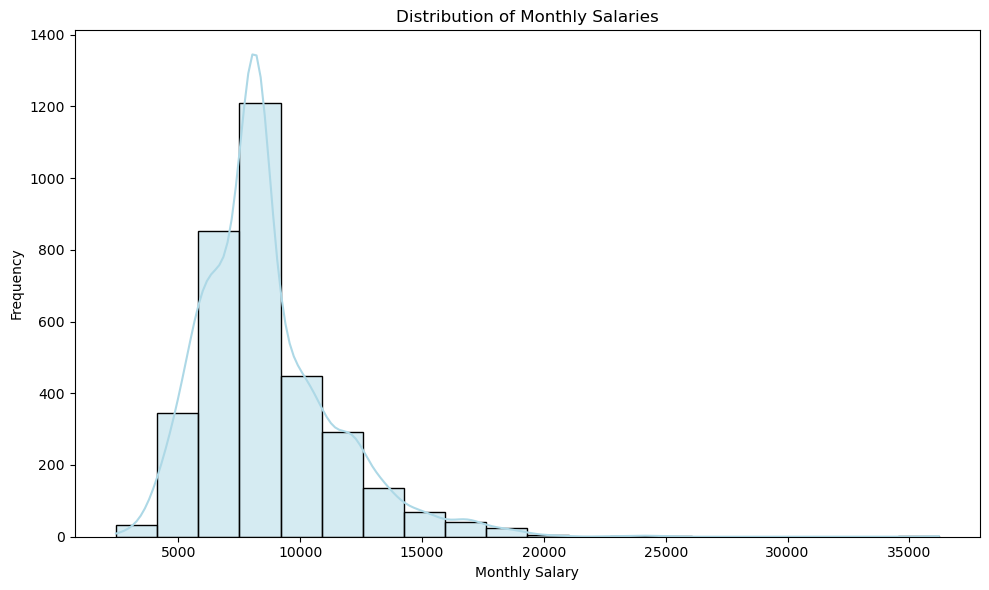

In [8]:
# Creating a column for monthly salaries
df['salary_monthly'] = df['salary_yearly'] / 12

# Plotting a histogram of monthly salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_monthly'], bins=20, kde=True, color='lightblue')
plt.title('Distribution of Monthly Salaries')
plt.xlabel('Monthly Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



C:\Users\Nadas\AppData\Local\Temp\ipykernel_8820\4146737041.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='Blues_r')


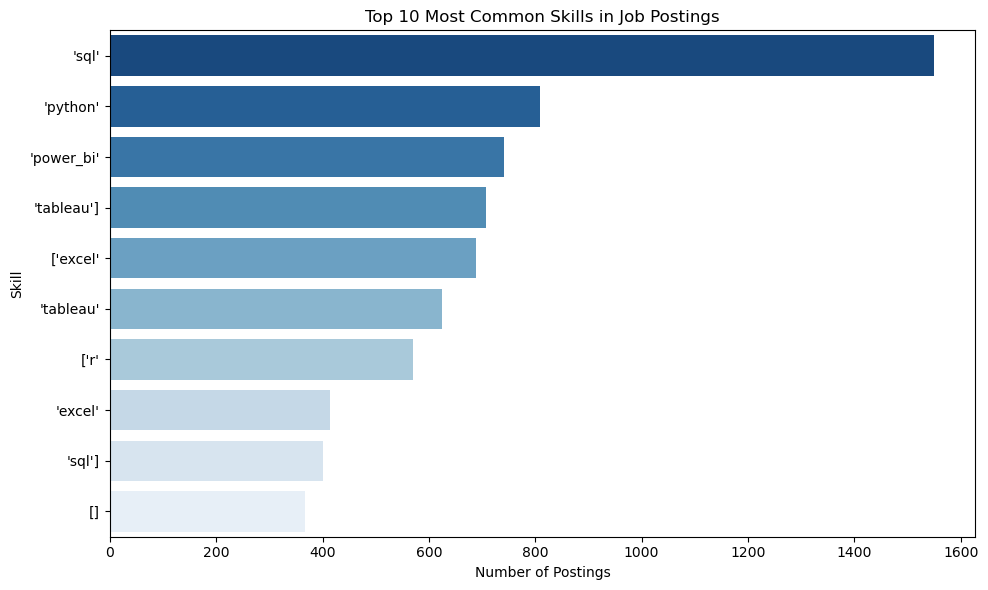

In [10]:
# Splitting description tokens into individual skills and count occurrences
skills_series = df['description_tokens'].dropna().str.split(',').explode().str.strip()

# Counting the most common skills
top_skills = skills_series.value_counts().head(10)

# Plotting a bar chart for the top 10 skills
plt.figure(figsize=(10, 6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette='Blues_r')
plt.title('Top 10 Most Common Skills in Job Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()


Description:
This bar chart shows the top 10 most frequently mentioned skills in job descriptions from the dataset. The x-axis represents the number of job postings where each skill is mentioned, while the y-axis lists the skills.

Key Insights:
SQL is by far the most common skill, appearing in nearly 1600 job postings. This highlights the importance of SQL as a foundational skill for data-related jobs.
Python is the second most common skill, with over 1000 mentions, making it another critical programming language in the data field.
Power BI and Tableau appear frequently as well, indicating a high demand for skills in data visualization and business intelligence tools.
Interestingly, there are multiple variations of the same skills, such as Tableau and 'tableau'] or Excel and 'excel'], likely due to inconsistent formatting or tokenization in the data.
Other common skills include R, which appears in around 500 postings, showing the importance of statistical programming in certain roles.
Interpretation:
The dominance of SQL and Python suggests that many jobs in the dataset require core programming and database management skills.
Data visualization tools like Tableau and Power BI are also in high demand, indicating that jobs often involve creating visual reports and dashboards.
The presence of formatting inconsistencies in the chart (e.g., ['excel' and excel as separate entries) suggests that cleaning and standardization of the description_tokens column could help refine the skill analysis.

C:\Users\Nadas\AppData\Local\Temp\ipykernel_6012\1393926815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['location'].isin(top_locations)], x='salary_yearly', y='location', palette='Blues_r')


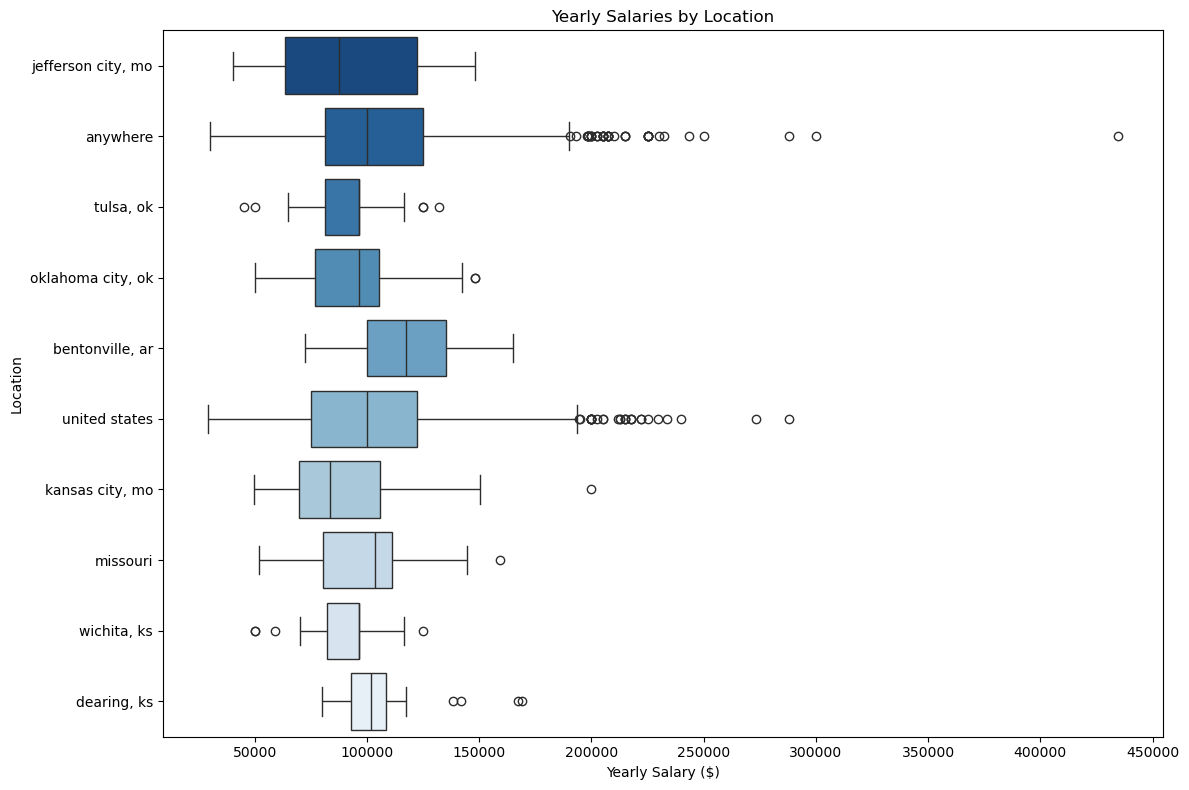

In [5]:
# Plotting boxplot of salaries by location (showing top 10 locations)
top_locations = df['location'].value_counts().head(10).index
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[df['location'].isin(top_locations)], x='salary_yearly', y='location', palette='Blues_r')
plt.title('Yearly Salaries by Location')
plt.xlabel('Yearly Salary ($)')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


Description:
This box plot visualizes the distribution of yearly salaries across different locations. Each box represents the interquartile range (IQR) of the salary data for each location, while the whiskers show the spread of the data. Outliers are indicated by dots beyond the whiskers.

Key Insights:
Jefferson City, MO: This location has a relatively high median salary with a smaller spread compared to other locations, suggesting that salaries in this area are more consistent but tend to be on the higher side.
Anywhere: Roles with a flexible or remote location ("Anywhere") have a broad salary distribution, with many outliers, indicating high variability in salaries. The median salary is also relatively high.
Tulsa, OK and Oklahoma City, OK: These locations show more modest salary ranges, with Tulsa, OK showing a smaller spread and several lower salaries, while Oklahoma City, OK has a wider range of salaries with some outliers.
Bentonville, AR: This location has a fairly consistent salary range, with a median slightly above $100,000, but there are a few outliers at the higher end.
United States: When "United States" is specified as a location (likely meaning various regions or remote), it shows a wider salary range, with some high outliers beyond $200,000, indicating potential high-paying roles in different areas.
Kansas City, MO, Missouri, and Wichita, KS: These locations have moderate salary ranges, but Kansas City has a higher upper bound and outliers, suggesting that it may offer more high-paying roles than some other locations in Missouri.
Dearing, KS: This location has a relatively lower salary range compared to the others, with some outliers present.
Interpretation:
Locations such as Jefferson City, MO and Anywhere (Remote) tend to offer higher median salaries, making them attractive for higher-paying jobs.
Tulsa, OK and Dearing, KS show the lowest salary ranges, indicating that jobs in these locations might generally offer lower compensation.
The spread of salaries for locations like United States and Anywhere suggests that roles with flexible or multiple-location possibilities can vary widely in terms of compensation, with some positions offering extremely high salaries (over $200,000).

C:\Users\Nadas\AppData\Local\Temp\ipykernel_6012\2700635529.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills_title.values, y=top_skills_title.index, palette='Blues_r')


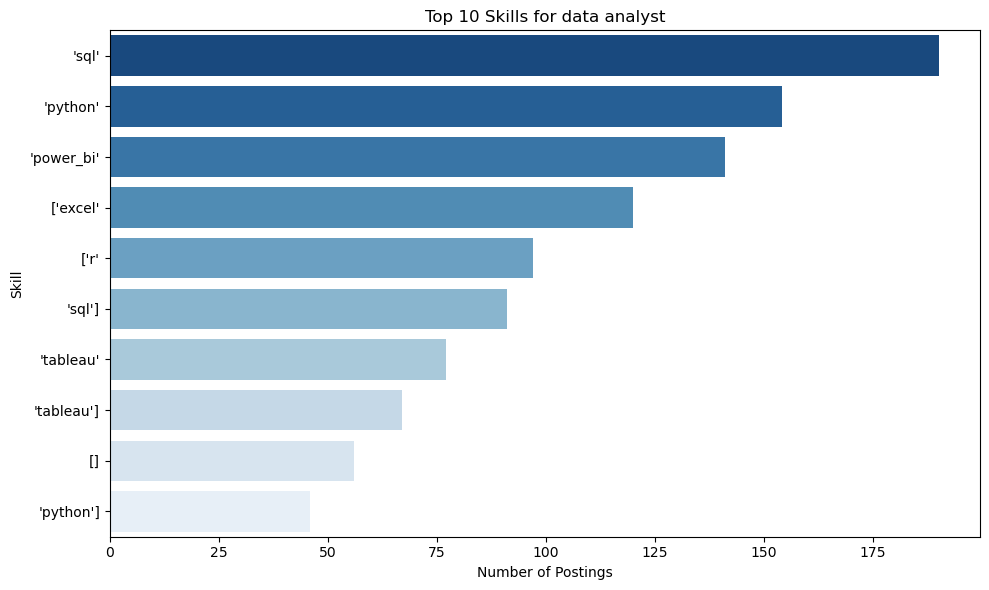

C:\Users\Nadas\AppData\Local\Temp\ipykernel_6012\2700635529.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills_title.values, y=top_skills_title.index, palette='Blues_r')


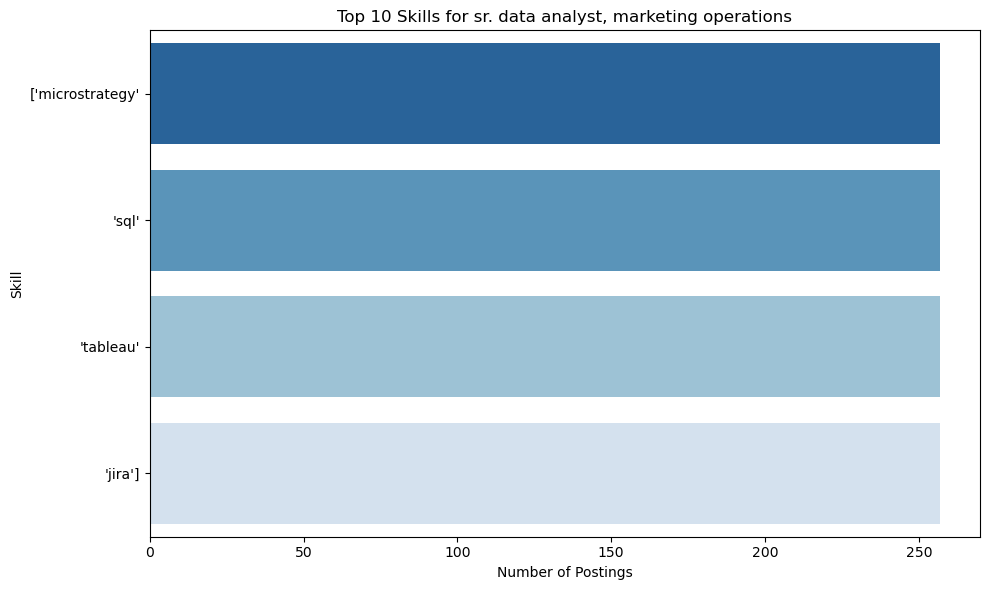

C:\Users\Nadas\AppData\Local\Temp\ipykernel_6012\2700635529.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills_title.values, y=top_skills_title.index, palette='Blues_r')


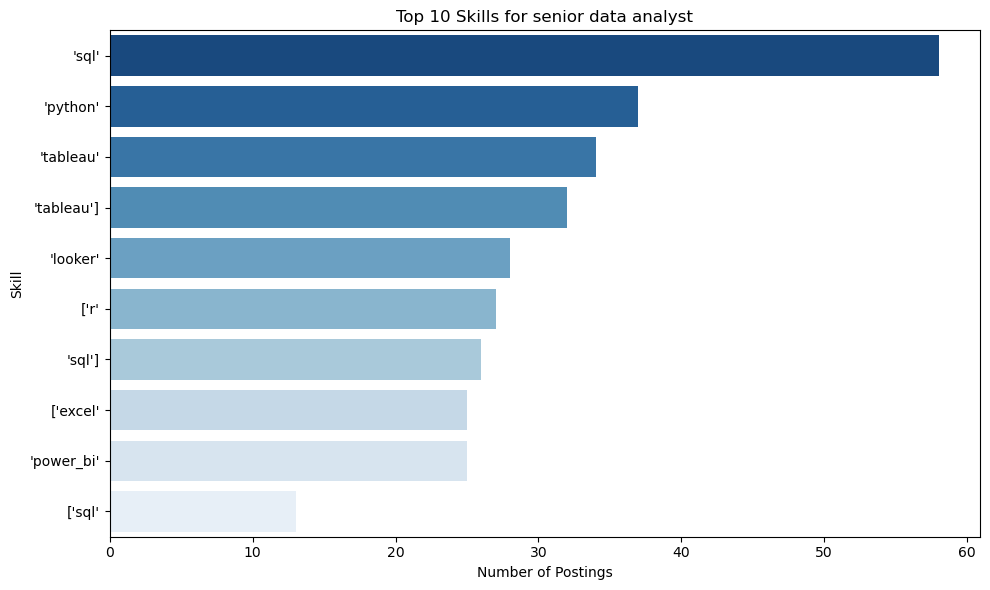

C:\Users\Nadas\AppData\Local\Temp\ipykernel_6012\2700635529.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills_title.values, y=top_skills_title.index, palette='Blues_r')


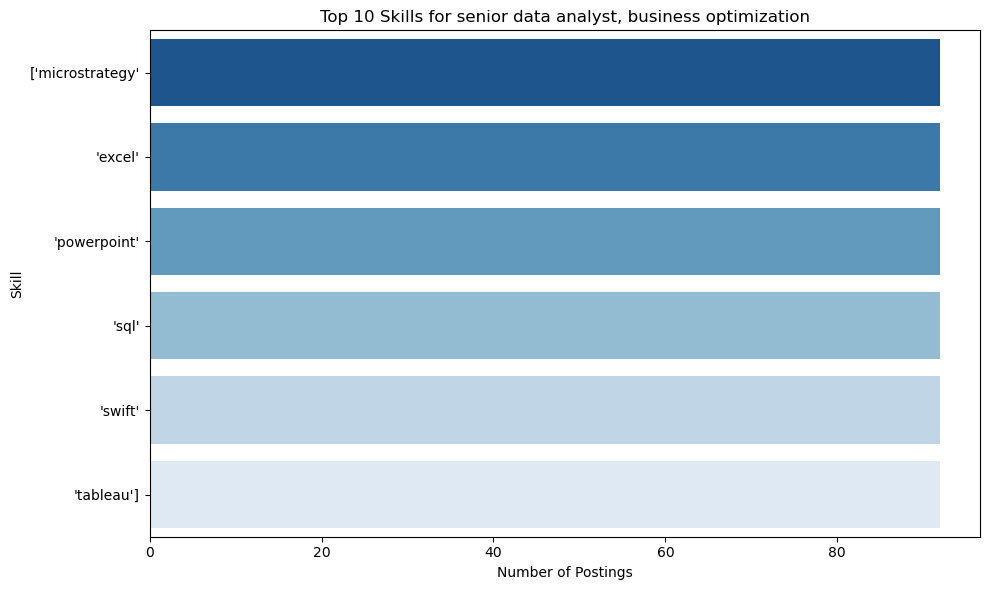

C:\Users\Nadas\AppData\Local\Temp\ipykernel_6012\2700635529.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills_title.values, y=top_skills_title.index, palette='Blues_r')


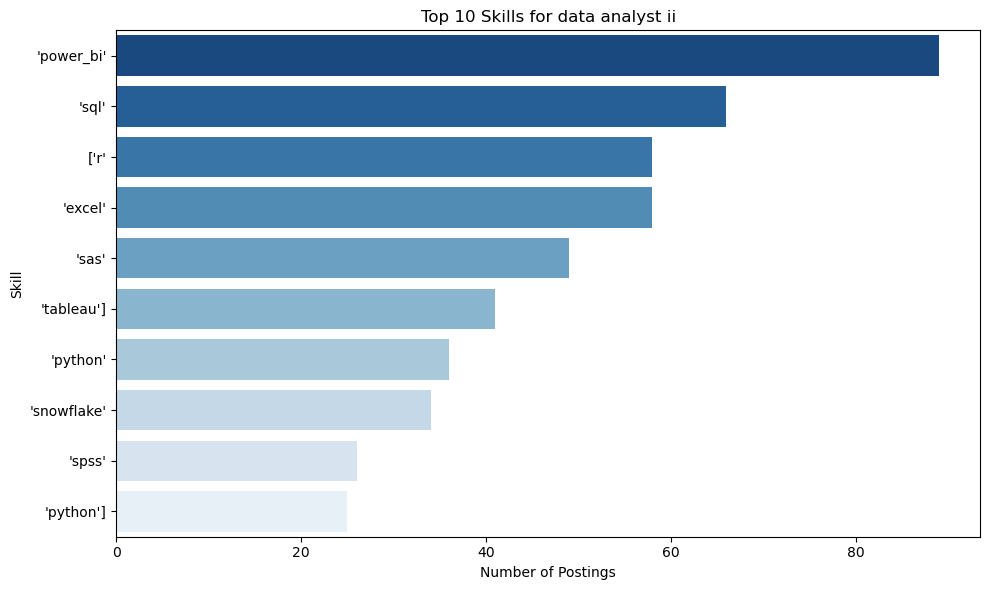

In [6]:
# Filtering the top 5 job titles
top_job_titles = df['title'].value_counts().head(5).index

for title in top_job_titles:
    # Extracting relevant job postings
    title_df = df[df['title'] == title]
    
    # Get the most common skills for each job title
    skills_series_title = title_df['description_tokens'].dropna().str.split(',').explode().str.strip()
    top_skills_title = skills_series_title.value_counts().head(10)

    # Plotting for each title
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_skills_title.values, y=top_skills_title.index, palette='Blues_r')
    plt.title(f'Top 10 Skills for {title}')
    plt.xlabel('Number of Postings')
    plt.ylabel('Skill')
    plt.tight_layout()
    plt.show()
